In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from scipy import stats
from sklearn.cluster import AgglomerativeClustering  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [2]:
Patients = pd.read_csv('Colorectal Cancer Patient Data.csv')
Patients

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0
61,61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0


In [3]:
Patients = Patients.drop(index=62, axis=0)


In [4]:
Patients = Patients.drop("Unnamed: 0", axis="columns")

In [5]:
Patients.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_REF           62 non-null     object 
 1   Age (in years)   62 non-null     float64
 2   Dukes Stage      62 non-null     object 
 3   Gender           62 non-null     object 
 4   Location         62 non-null     object 
 5   DFS (in months)  62 non-null     float64
 6   DFS event        62 non-null     float64
 7   Adj_Radio        62 non-null     float64
 8   Adj_Chem         62 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.8+ KB


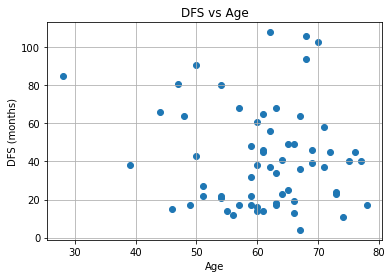

In [6]:
plt.scatter(Patients['Age (in years)'], Patients['DFS (in months)'])
plt.title('DFS vs Age')
plt.xlabel('Age')
plt.ylabel('DFS (months)')
plt.grid()
plt.show()

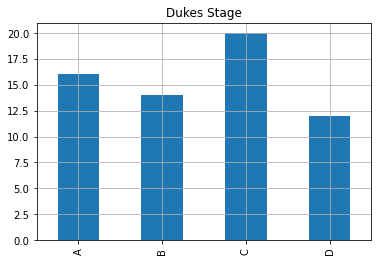

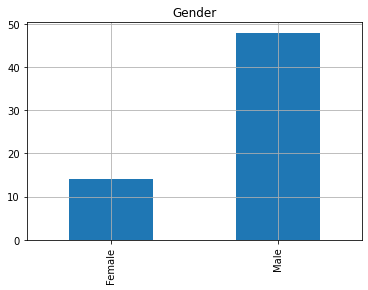

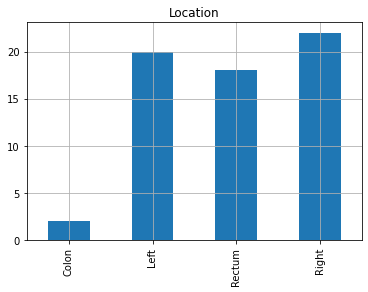

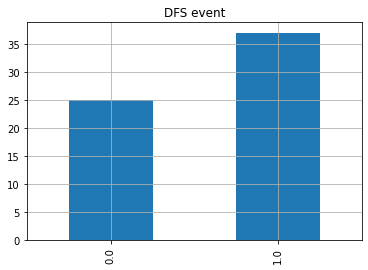

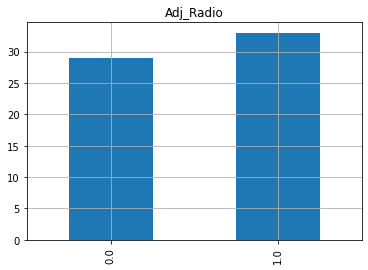

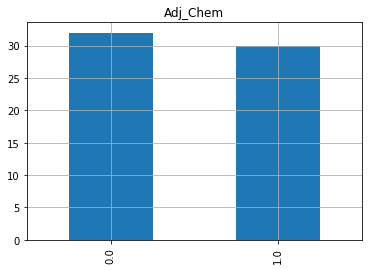

In [7]:
features = ['Dukes Stage', 'Gender', 'Location', 
                'DFS event', 'Adj_Radio', 'Adj_Chem']
for f in features:
    Patients[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [8]:
gene = pd.read_csv('Colorectal Cancer Gene Expression Data.csv')
gene.head()

,Unnamed: 0,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537


In [9]:
gene = gene.transpose()
# let's check the result:
gene.head()

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454


In [10]:
gene = gene.drop(index="Unnamed: 0", axis=0)

In [11]:
gene

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,3.161023,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.4227,6.072618,2.853109
GSM877185,5.69401,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,3.392471,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,3.381974,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,3.222998,...,3.43826,2.539084,3.33459,5.842051,3.496104,4.883845,4.661893,2.581452,7.23209,2.719928


In [12]:
# use first content row as column headers
col_names = gene.iloc[0].tolist()
gene.columns = col_names
# now remove redundant first row
gene = gene.drop(axis=0, index='ID_REF')
gene

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,3.338311,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.66636,5.013006,2.65713,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,3.161023,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.4227,6.072618,2.853109
GSM877185,5.69401,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,3.392471,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,3.381974,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,3.222998,...,3.43826,2.539084,3.33459,5.842051,3.496104,4.883845,4.661893,2.581452,7.23209,2.719928


In [13]:
# add ID_REF (as first column) by copying index
gene.insert(loc=0, column='ID_REF', value=gene.index)

# and reset index
gene = gene.reset_index(drop=True)

# convert to numerical
features_gene_num = gene.columns.tolist()[1:]
gene[features_gene_num] = gene[features_gene_num].astype(float)

In [14]:
gene

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,5.694010,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [15]:
gene[features_gene_num].describe()

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,5.707784,10.220618,7.533482,7.331769,2.982030,7.279824,5.982484,3.885063,7.737473,3.460415,...,3.722569,2.697402,3.445108,5.849156,3.437122,4.319765,4.530284,2.580418,7.007763,2.886002
std,1.141096,0.506397,0.448784,0.346860,0.181438,0.526905,0.353695,0.185737,1.364183,0.287547,...,0.194573,0.191073,0.182877,0.466693,0.267659,0.648902,0.329638,0.107296,1.362131,0.274488
min,4.285183,7.754544,6.119306,6.699796,2.650723,5.992824,5.285014,3.499041,4.685060,3.114340,...,3.251912,2.397467,2.994022,4.711967,2.709493,3.168259,3.668514,2.329777,4.983739,2.596916
25%,4.917209,10.010747,7.306200,7.077712,2.860146,7.007140,5.738839,3.742372,7.057896,3.306567,...,3.613045,2.571041,3.323543,5.539251,3.289856,3.894832,4.373952,2.515328,5.864103,2.733037
50%,5.363241,10.239241,7.500395,7.263498,2.956179,7.231809,5.989217,3.858752,7.652836,3.391923,...,3.720273,2.677127,3.438560,5.863188,3.399116,4.205774,4.543968,2.581821,6.831109,2.844452
75%,6.261369,10.545181,7.763559,7.545533,3.070789,7.566110,6.271426,4.020531,8.673869,3.496251,...,3.841272,2.795925,3.572996,6.161970,3.554152,4.676389,4.682515,2.654503,7.687362,2.929875
max,10.368146,10.996956,8.810034,8.588304,3.572938,8.969693,6.622151,4.332709,10.774562,4.758090,...,4.358848,3.473473,3.861362,6.852246,4.414884,6.897634,5.241488,2.764213,11.694707,4.030978


In [16]:
# left join
crc = Patients.join(other=gene.set_index('ID_REF'), on='ID_REF', how='left')
crc

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [17]:
crc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Columns: 1944 entries, ID_REF to 1554921_a_at
dtypes: float64(1940), object(4)
memory usage: 942.1+ KB


In [18]:
drops=["ID_REF",	"Age (in years)",	"Dukes Stage",	"Gender",	"Location"	,"DFS (in months)",	"DFS event",	"Adj_Radio",	"Adj_Chem"]
data = crc.drop(drops, axis=1)
normalize = normalize(data)
data_scaled = pd.DataFrame(normalize)
data_scaled.var()

0       3.319900e-05
1       6.676326e-06
2       4.680992e-06
3       3.007031e-06
4       1.000314e-06
            ...     
1930    1.087835e-05
1931    3.290701e-06
1932    3.578334e-07
1933    4.804293e-05
1934    2.117630e-06
Length: 1935, dtype: float64

In [19]:
#storing the variance and name of variables

variance = data_scaled.var()
columns = data.columns
threshold = variance.mean()
columns

Index(['117_at', '1007_s_at', '1053_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       '1554911_at', '1554912_at', '1554914_at', '1554915_a_at',
       '1554916_a_at', '1554918_a_at', '1554919_s_at', '1554920_at',
       '213418_at', '1554921_a_at'],
      dtype='object', length=1935)

In [20]:
#saving the names of variables having variance more than a threshold value

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=threshold: #setting the threshold as mean
        variable.append(columns[i])

In [21]:
# creating a new dataframe using the above variables
new_data = data[variable]

# first five rows of the new data
new_data

,117_at,1007_s_at,1053_at,1294_at,1405_i_at,1438_at,1487_at,1552256_a_at,1552257_a_at,1552263_at,...,1554883_a_at,1554887_at,1554894_a_at,1554895_a_at,1554897_s_at,1554899_s_at,1554906_a_at,1554915_a_at,1554918_a_at,213418_at
0,6.029834,9.468893,7.187090,7.397013,7.572331,6.957488,8.057704,7.246198,8.998012,6.293766,...,4.758180,3.138654,5.573480,5.553679,6.960922,6.892799,3.198823,5.603126,4.009692,7.494499
1,6.344321,9.994204,7.705626,7.163797,8.295322,7.366494,8.450329,8.113613,9.154566,7.781680,...,5.938157,4.435348,6.232880,4.272392,4.855259,8.284930,5.684427,6.601744,4.679732,8.156995
2,5.023127,10.409823,7.934057,7.375224,7.055579,9.190242,8.186155,7.038909,8.273925,5.245886,...,4.771928,3.879020,5.987204,4.965354,5.917603,7.795275,4.142961,6.003205,4.781843,6.058687
3,4.612727,10.596921,7.446374,7.596233,9.683806,7.493741,7.398235,7.547753,9.075829,5.958728,...,4.129623,3.356249,5.459751,6.379816,7.425279,6.832234,4.117941,5.858326,3.653575,5.488072
4,5.865944,10.252547,7.141105,7.278244,7.360892,6.068710,7.919004,7.921648,7.992741,6.249177,...,4.563200,3.550378,5.474279,3.776334,4.572010,8.857153,3.572345,5.388115,4.666360,7.410725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,10.343581,7.471584,7.628249,7.830382,6.052478,8.063333,8.242522,9.106362,6.273343,...,4.124851,3.348216,6.130330,4.155537,4.310652,7.662054,3.507853,6.026848,4.103411,6.072618
58,5.694010,9.409749,7.488735,7.192814,7.271917,6.926154,8.081780,7.401747,8.272418,6.194941,...,5.616179,4.384192,7.023262,3.315846,3.221399,6.881848,4.281663,6.167214,4.724017,7.175365
59,8.661629,10.427298,7.512632,5.992824,5.335867,6.081336,7.960783,7.218739,8.472297,5.501083,...,5.565068,3.799677,5.027002,3.654481,4.580264,9.044531,3.531801,6.238026,6.897634,10.121831
60,5.702601,10.309094,7.476872,6.878941,8.280592,7.979070,8.133530,8.025717,9.137002,5.996369,...,5.003969,4.656464,6.365554,4.076950,4.302570,7.273896,3.280669,5.842051,4.883845,7.232090


In [22]:
mean1 =new_data.mean()
z = np.abs(stats.zscore(new_data))
print(z)

[[0.28453244 1.49657492 0.77814555 ... 0.53147998 0.48174325 0.36025137]
 [0.56238353 0.45075713 0.38671045 ... 1.62576549 0.55926158 0.8505893 ]
 [0.60489784 0.37667981 0.8998655  ... 0.33278194 0.71790539 0.70244544]
 ...
 [2.60973654 0.41147037 0.0468366  ... 0.84004989 4.00509649 2.3048365 ]
 [0.00457954 0.17614302 0.12716868 ... 0.0153469  0.87638061 0.16603274]
 [1.06675833 1.54557771 0.18043197 ... 0.68258528 0.01308584 1.06665225]]


In [23]:
#setting threshold as 3, detecting outliers
print(np.where(z > 3))

(array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  5,
        5,  5,  6,  7,  7,  7,  7,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       12, 13, 14, 14, 14, 14, 14, 14, 14, 14, 15, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 24, 25, 26, 27, 27, 27,
       27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 29, 30, 30, 30, 31, 31, 31,
       32, 33, 33, 33, 33, 33, 33, 33, 33, 34, 35, 35, 36, 36, 36, 36, 36,
       37, 38, 38, 38, 38, 38, 39, 40, 43, 43, 44, 44, 44, 44, 45, 45, 45,
       45, 46, 47, 47, 4

In [24]:
#Removing Outliers

for i in range(441):
  for j in range(62):
     if z.any()>3:
      new_data.loc[j-1,column[i-1]]= mean1[i-1]
new_data

,117_at,1007_s_at,1053_at,1294_at,1405_i_at,1438_at,1487_at,1552256_a_at,1552257_a_at,1552263_at,...,1554883_a_at,1554887_at,1554894_a_at,1554895_a_at,1554897_s_at,1554899_s_at,1554906_a_at,1554915_a_at,1554918_a_at,213418_at
0,6.029834,9.468893,7.187090,7.397013,7.572331,6.957488,8.057704,7.246198,8.998012,6.293766,...,4.758180,3.138654,5.573480,5.553679,6.960922,6.892799,3.198823,5.603126,4.009692,7.494499
1,6.344321,9.994204,7.705626,7.163797,8.295322,7.366494,8.450329,8.113613,9.154566,7.781680,...,5.938157,4.435348,6.232880,4.272392,4.855259,8.284930,5.684427,6.601744,4.679732,8.156995
2,5.023127,10.409823,7.934057,7.375224,7.055579,9.190242,8.186155,7.038909,8.273925,5.245886,...,4.771928,3.879020,5.987204,4.965354,5.917603,7.795275,4.142961,6.003205,4.781843,6.058687
3,4.612727,10.596921,7.446374,7.596233,9.683806,7.493741,7.398235,7.547753,9.075829,5.958728,...,4.129623,3.356249,5.459751,6.379816,7.425279,6.832234,4.117941,5.858326,3.653575,5.488072
4,5.865944,10.252547,7.141105,7.278244,7.360892,6.068710,7.919004,7.921648,7.992741,6.249177,...,4.563200,3.550378,5.474279,3.776334,4.572010,8.857153,3.572345,5.388115,4.666360,7.410725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,10.343581,7.471584,7.628249,7.830382,6.052478,8.063333,8.242522,9.106362,6.273343,...,4.124851,3.348216,6.130330,4.155537,4.310652,7.662054,3.507853,6.026848,4.103411,6.072618
58,5.694010,9.409749,7.488735,7.192814,7.271917,6.926154,8.081780,7.401747,8.272418,6.194941,...,5.616179,4.384192,7.023262,3.315846,3.221399,6.881848,4.281663,6.167214,4.724017,7.175365
59,8.661629,10.427298,7.512632,5.992824,5.335867,6.081336,7.960783,7.218739,8.472297,5.501083,...,5.565068,3.799677,5.027002,3.654481,4.580264,9.044531,3.531801,6.238026,6.897634,10.121831
60,5.702601,10.309094,7.476872,6.878941,8.280592,7.979070,8.133530,8.025717,9.137002,5.996369,...,5.003969,4.656464,6.365554,4.076950,4.302570,7.273896,3.280669,5.842051,4.883845,7.232090


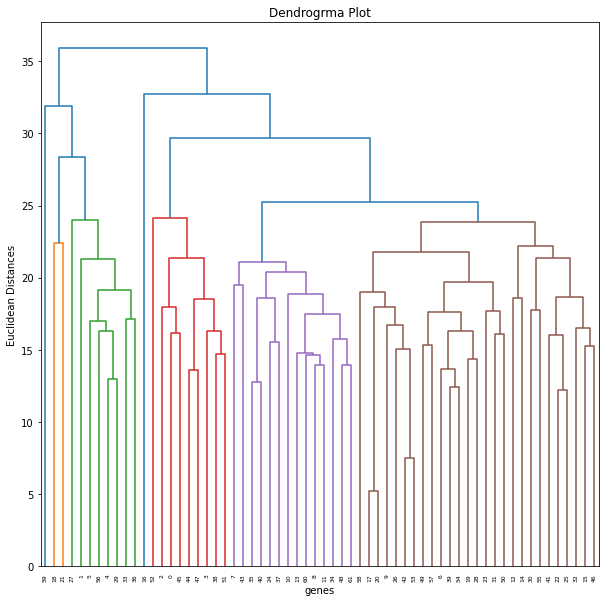

In [25]:
import scipy.cluster.hierarchy as shc  
plt.figure(figsize=(10, 10)) 
dendro = shc.dendrogram(shc.linkage(new_data, method="complete"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("genes")  
plt.show()  

In [26]:
stage = crc["Dukes Stage"]
lut = dict(zip(stage.unique(), "rbg"))
col_colors = stage.map(lut)

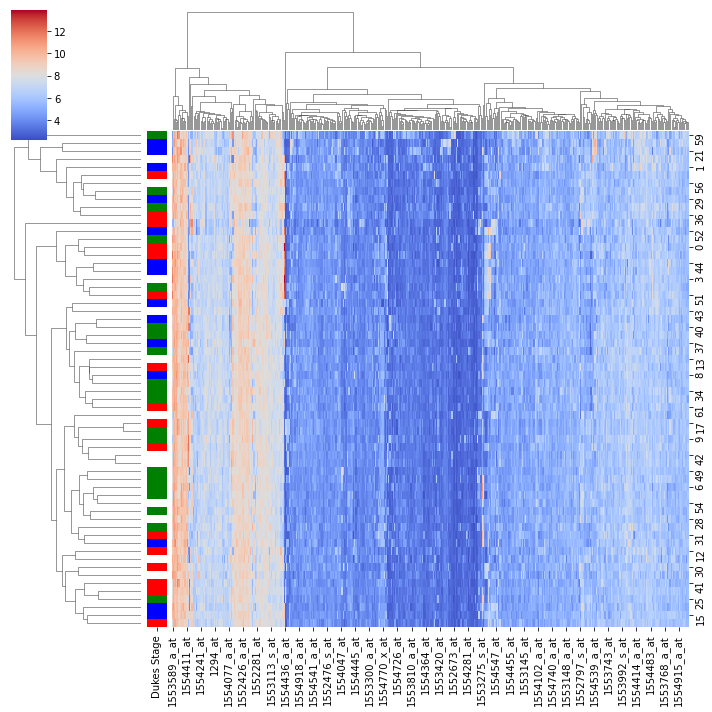

In [27]:
# changing color of the map.
sns.clustermap(new_data, figsize=(10, 10), method="complete", row_colors= col_colors, cmap="coolwarm")

In [28]:
#training the hierarchical model on dataset  

hc= AgglomerativeClustering(distance_threshold=33,n_clusters= None,compute_full_tree=True)  
y_pred= hc.fit_predict(new_data) 
y_pred

array([3, 1, 3, 3, 1, 1, 2, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 2, 0, 2, 2, 0,
       2, 4, 4, 2, 4, 1, 2, 1, 4, 4, 1, 1, 4, 4, 1, 4, 3, 2, 4, 2, 2, 4,
       3, 3, 1, 3, 4, 2, 4, 3, 1, 2, 2, 4, 1, 2, 2, 0, 4, 4], dtype=int64)

In [29]:
zero = new_data[ y_pred == 0] 
one = new_data[ y_pred ==1 ]
two = new_data[ y_pred == 2 ]
three = new_data[ y_pred == 3]
four = new_data[y_pred == 4]
print(zero.shape)
print(one.shape)
print(two.shape)
print(three.shape)
print(four.shape)


(3, 441)
(16, 441)
(15, 441)
(8, 441)
(20, 441)


In [30]:
crc_new = new_data.copy()
crc_new["Clusters"] = y_pred
crc_new

,117_at,1007_s_at,1053_at,1294_at,1405_i_at,1438_at,1487_at,1552256_a_at,1552257_a_at,1552263_at,...,1554887_at,1554894_a_at,1554895_a_at,1554897_s_at,1554899_s_at,1554906_a_at,1554915_a_at,1554918_a_at,213418_at,Clusters
0,6.029834,9.468893,7.187090,7.397013,7.572331,6.957488,8.057704,7.246198,8.998012,6.293766,...,3.138654,5.573480,5.553679,6.960922,6.892799,3.198823,5.603126,4.009692,7.494499,3
1,6.344321,9.994204,7.705626,7.163797,8.295322,7.366494,8.450329,8.113613,9.154566,7.781680,...,4.435348,6.232880,4.272392,4.855259,8.284930,5.684427,6.601744,4.679732,8.156995,1
2,5.023127,10.409823,7.934057,7.375224,7.055579,9.190242,8.186155,7.038909,8.273925,5.245886,...,3.879020,5.987204,4.965354,5.917603,7.795275,4.142961,6.003205,4.781843,6.058687,3
3,4.612727,10.596921,7.446374,7.596233,9.683806,7.493741,7.398235,7.547753,9.075829,5.958728,...,3.356249,5.459751,6.379816,7.425279,6.832234,4.117941,5.858326,3.653575,5.488072,3
4,5.865944,10.252547,7.141105,7.278244,7.360892,6.068710,7.919004,7.921648,7.992741,6.249177,...,3.550378,5.474279,3.776334,4.572010,8.857153,3.572345,5.388115,4.666360,7.410725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,10.343581,7.471584,7.628249,7.830382,6.052478,8.063333,8.242522,9.106362,6.273343,...,3.348216,6.130330,4.155537,4.310652,7.662054,3.507853,6.026848,4.103411,6.072618,2
58,5.694010,9.409749,7.488735,7.192814,7.271917,6.926154,8.081780,7.401747,8.272418,6.194941,...,4.384192,7.023262,3.315846,3.221399,6.881848,4.281663,6.167214,4.724017,7.175365,2
59,8.661629,10.427298,7.512632,5.992824,5.335867,6.081336,7.960783,7.218739,8.472297,5.501083,...,3.799677,5.027002,3.654481,4.580264,9.044531,3.531801,6.238026,6.897634,10.121831,0
60,5.702601,10.309094,7.476872,6.878941,8.280592,7.979070,8.133530,8.025717,9.137002,5.996369,...,4.656464,6.365554,4.076950,4.302570,7.273896,3.280669,5.842051,4.883845,7.232090,4


In [31]:
#splitting dataset into a training set and test set

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(crc_new.drop("Clusters", axis=1), crc_new["Clusters"], test_size=0.3, random_state =1)

In [32]:
scaler=StandardScaler()
X_train_lr=scaler.fit_transform(X_train_lr)
X_test_lr=scaler.transform(X_test_lr) 


In [34]:
#fitting logistic Regression to training set


classifier1 = LogisticRegression(random_state = 0)


lr1_model = classifier1.fit(X_train_lr, y_train_lr)

report1 = classification_report(y_test_lr, classifier1.predict(X_test_lr))
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         2
           2       0.60      1.00      0.75         3
           3       1.00      0.60      0.75         5
           4       1.00      0.75      0.86         8

    accuracy                           0.79        19
   macro avg       0.82      0.87      0.80        19
weighted avg       0.88      0.79      0.80        19



In [35]:
#{Decision Tree Model}
clf1 = DecisionTreeClassifier(random_state = 0)
clf1_model = clf1.fit(X_train_lr, y_train_lr)
report2 = classification_report(y_test_lr, clf1.predict(X_test_lr))
print(report2)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      1.00      0.67         2
           2       0.25      0.33      0.29         3
           3       1.00      0.40      0.57         5
           4       0.71      0.62      0.67         8

    accuracy                           0.58        19
   macro avg       0.59      0.67      0.57        19
weighted avg       0.68      0.58      0.58        19



In [36]:
#{K Neighbors Classifier}
knn1 = KNeighborsClassifier()
knn1.fit(X_train_lr, y_train_lr)
report3 = classification_report(y_test_lr, knn1.predict(X_test_lr))
print(report3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.25      1.00      0.40         2
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         5
           4       1.00      0.62      0.77         8

    accuracy                           0.53        19
   macro avg       0.35      0.53      0.37        19
weighted avg       0.53      0.53      0.47        19



In [37]:
#{using MLPClassifier}
mlpc1 = MLPClassifier(random_state = 0)
mlpc1.fit(X_train_lr, y_train_lr)
report4 = classification_report(y_test_lr, mlpc1.predict(X_test_lr))
print(report4)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         2
           2       0.60      1.00      0.75         3
           3       1.00      0.40      0.57         5
           4       1.00      0.75      0.86         8

    accuracy                           0.68        19
   macro avg       0.59      0.63      0.54        19
weighted avg       0.81      0.68      0.68        19



In [38]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc1 =SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc1 =AdaBoostClassifier(n_estimators=50, base_estimator=svc1,learning_rate=1, random_state=0)

# Train Adaboost Classifer
abc1_model = abc1.fit(X_train_lr, y_train_lr)

#Predict the response for test dataset
y_pred_abc1 = abc1_model.predict(X_test_lr)


# Model Accuracy, how often is the classifier correct?
report5 = classification_report(y_test_lr, y_pred_abc1)
print(report5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         2
           2       0.60      1.00      0.75         3
           3       1.00      0.60      0.75         5
           4       1.00      0.75      0.86         8

    accuracy                           0.79        19
   macro avg       0.82      0.87      0.80        19
weighted avg       0.88      0.79      0.80        19



In [39]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train_lr, y_train_lr)

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_lr, y_train_lr)
base_accuracy = evaluate(base_model, X_test_lr,y_test_lr)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Model Performance
Average Error: 0.9474 degrees.
Accuracy = -inf%.


In [41]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_lr,y_test_lr)
report6 = classification_report(y_test_lr, best_random.predict(X_test_lr))
print(report6)

Model Performance
Average Error: 0.7895 degrees.
Accuracy = -inf%.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         2
           2       0.50      1.00      0.67         3
           3       0.00      0.00      0.00         5
           4       0.71      0.62      0.67         8

    accuracy                           0.53        19
   macro avg       0.31      0.53      0.37        19
weighted avg       0.41      0.53      0.44        19



In [42]:
best_random

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800)

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold


xgbc1 = XGBClassifier()


xgbc1_model=xgbc1.fit(X_train_lr, y_train_lr)

# - cross validataion
scores = cross_val_score(xgbc1, X_train_lr, y_train_lr, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc1, X_train_lr, y_train_lr, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc1.predict(X_test_lr)
report7 = classification_report(y_test_lr,ypred)
print(report7)

[17:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:42:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [44]:
# Calcualte the Fisher Score (chi2) between each feature and target

fisher_score = chi2(new_data, crc_new["Clusters"])
p_values = pd.Series(fisher_score[1])
p_values.index =new_data.columns
p= p_values.sort_values(ascending=False)


Text(0.5, 1.0, 'p values for various genes')

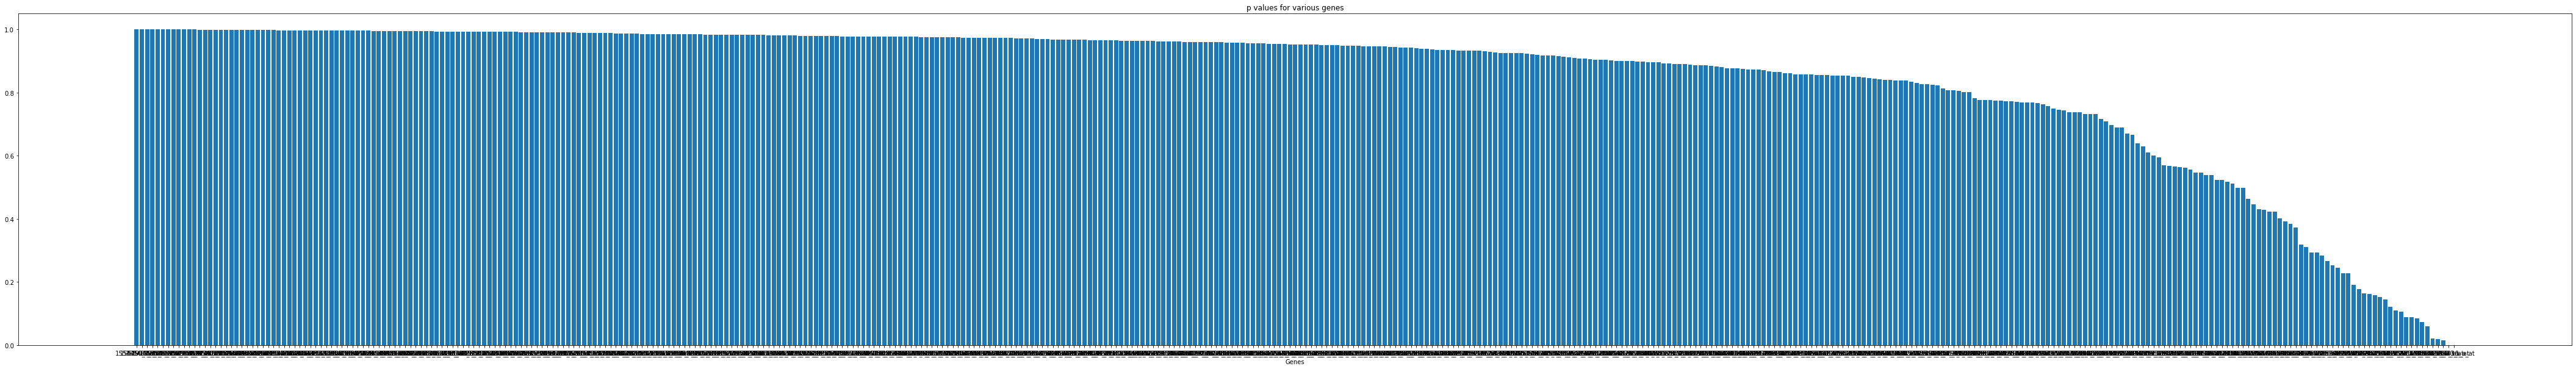

In [45]:
p_value= pd.DataFrame(p)
p_value.columns=["Values"]
plt.rcParams['figure.figsize'] = [75, 10]
plt.bar(p_value.index,p_value["Values"])
plt.xlabel('Genes')
plt.title('p values for various genes')

In [226]:
#feature selection using p _values

df= pd.DataFrame(list(zip(p_value.index,p_value.values)))
drop2=list(df[df[1]>0.7][0])
crc_imp=crc_new.drop(drop2,  axis=1)
crc_imp

,117_at,1405_i_at,1552281_at,1552304_at,1552306_at,1552309_a_at,1552316_a_at,1552348_at,1552349_a_at,1552365_at,...,1554576_a_at,1554679_a_at,1554741_s_at,1554743_x_at,1554807_a_at,1554895_a_at,1554897_s_at,1554899_s_at,213418_at,Clusters
0,6.029834,7.572331,6.470622,3.365764,3.694957,6.677284,5.587809,4.407475,3.467443,7.578244,...,7.097690,5.736585,4.778011,3.366225,5.496920,5.553679,6.960922,6.892799,7.494499,3
1,6.344321,8.295322,7.581700,3.347428,4.554358,6.437991,5.313062,4.368247,3.157303,4.528862,...,6.080907,9.389851,5.488112,3.542597,4.241956,4.272392,4.855259,8.284930,8.156995,1
2,5.023127,7.055579,6.405948,3.983271,3.569708,6.106336,5.183668,4.363488,3.368064,7.389837,...,7.337380,7.428795,4.139335,3.515279,3.454274,4.965354,5.917603,7.795275,6.058687,3
3,4.612727,9.683806,6.372876,3.476390,4.121508,7.151663,6.462919,4.788979,3.501691,7.366303,...,7.171472,9.709357,5.161560,3.456926,4.625171,6.379816,7.425279,6.832234,5.488072,3
4,5.865944,7.360892,7.471077,3.847737,3.826835,9.499553,5.458117,4.721074,3.676973,5.484195,...,6.066377,8.099271,7.362422,3.016102,4.714597,3.776334,4.572010,8.857153,7.410725,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4.835558,7.830382,7.755748,3.517974,3.859917,7.263982,5.683473,9.696932,8.127850,4.908879,...,6.687264,9.058262,5.112869,3.239572,4.181077,4.155537,4.310652,7.662054,6.072618,2
58,5.694010,7.271917,7.773011,3.894624,4.722994,9.764017,5.916660,3.857643,3.397146,4.097065,...,6.642799,9.046090,7.401908,3.605450,4.351833,3.315846,3.221399,6.881848,7.175365,2
59,8.661629,5.335867,7.690697,5.728192,5.733181,5.153274,3.795666,3.911677,3.102692,4.250933,...,8.273141,11.231670,5.789939,5.197959,5.988956,3.654481,4.580264,9.044531,10.121831,0
60,5.702601,8.280592,7.824664,3.563590,3.705307,7.655650,5.937847,7.185789,4.887181,4.980039,...,6.984729,9.692211,6.470163,3.403904,3.700141,4.076950,4.302570,7.273896,7.232090,4


In [227]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(crc_imp.drop("Clusters", axis=1), crc_new["Clusters"], test_size=0.3, random_state = 0)

In [228]:
scaler2=StandardScaler()
X_train_ft=scaler2.fit_transform(X_train_ft)
X_test_ft=scaler2.transform(X_test_ft) 

In [229]:

classifier2 = LogisticRegression(random_state = 0)
cl2_model = classifier2.fit(X_train_ft, y_train_ft)
classifier2.score(X_test_ft,y_test_ft)
n_report1 = classification_report(y_test_ft, cl2_model.predict(X_test_ft))
print(n_report1)

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         2
           3       1.00      0.67      0.80         3
           4       0.80      0.89      0.84         9

    accuracy                           0.79        19
   macro avg       0.82      0.79      0.76        19
weighted avg       0.85      0.79      0.79        19



In [230]:
#{Decision Tree Model}
clf2 = DecisionTreeClassifier(random_state = 0)
clf2_model = clf2.fit(X_train_ft, y_train_ft)
n_report2 = classification_report(y_test_ft, clf2_model.predict(X_test_ft))
print(n_report2)


              precision    recall  f1-score   support

           1       0.50      0.40      0.44         5
           2       0.29      1.00      0.44         2
           3       0.67      0.67      0.67         3
           4       1.00      0.56      0.71         9

    accuracy                           0.58        19
   macro avg       0.61      0.66      0.57        19
weighted avg       0.74      0.58      0.61        19



In [231]:
#{K Neighbors Classifier}
knn2 = KNeighborsClassifier()
knn2_model = knn2.fit(X_train_ft, y_train_ft)
n_report3 = classification_report(y_test_ft, knn2_model.predict(X_test_ft))
print(n_report3)


              precision    recall  f1-score   support

           1       0.75      0.60      0.67         5
           2       0.50      1.00      0.67         2
           3       0.75      1.00      0.86         3
           4       0.86      0.67      0.75         9

    accuracy                           0.74        19
   macro avg       0.71      0.82      0.74        19
weighted avg       0.77      0.74      0.74        19



In [232]:
#{using MLPClassifier}
mlpc2 = MLPClassifier(random_state = 0)
mlpc2_model=mlpc2.fit(X_train_ft, y_train_ft)
#Predict the response for test dataset
y_pred_mlpc2 = mlpc2_model.predict(X_test_ft)

n_report4 = classification_report(y_test_ft, mlpc2_model.predict(X_test_ft))
print(n_report4)

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       0.89      0.89      0.89         9

    accuracy                           0.89        19
   macro avg       0.92      0.92      0.92        19
weighted avg       0.89      0.89      0.89        19



In [233]:
#Ada Boost Classifier

svc2 =SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc2 =AdaBoostClassifier(n_estimators=50, base_estimator=svc2,learning_rate=1, random_state=0)

# Train Adaboost Classifer
abc2_model = abc2.fit(X_train_ft, y_train_ft)

#Predict the response for test dataset
y_pred_abc2 = abc2_model.predict(X_test_ft)


n_report5 = classification_report(y_test_ft, y_pred_abc2)
print(n_report5)

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         2
           3       1.00      0.67      0.80         3
           4       0.80      0.89      0.84         9

    accuracy                           0.79        19
   macro avg       0.82      0.79      0.76        19
weighted avg       0.85      0.79      0.79        19



In [234]:
#{using RandomForestClassifier}
rfor2 = RandomForestClassifier(random_state = 0)
rfor2_model = rfor2.fit(X_train_ft, y_train_ft)
n_report6 = classification_report(y_test_ft, rfor2_model.predict(X_test_ft))
print(n_report6)

              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           2       0.40      1.00      0.57         2
           3       1.00      0.33      0.50         3
           4       0.88      0.78      0.82         9

    accuracy                           0.63        19
   macro avg       0.67      0.63      0.57        19
weighted avg       0.72      0.63      0.63        19



In [235]:
xgbc2 = XGBClassifier()


xgbc2_model=xgbc2.fit(X_train_ft, y_train_ft)

# - cross validataion
scores = cross_val_score(xgbc2, X_train_ft, y_train_ft, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc2, X_train_ft, y_train_ft, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc2.predict(X_test_ft)
n_report7 = classification_report(y_test_ft, ypred)
print(n_report7)

[18:19:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<AxesSubplot:>

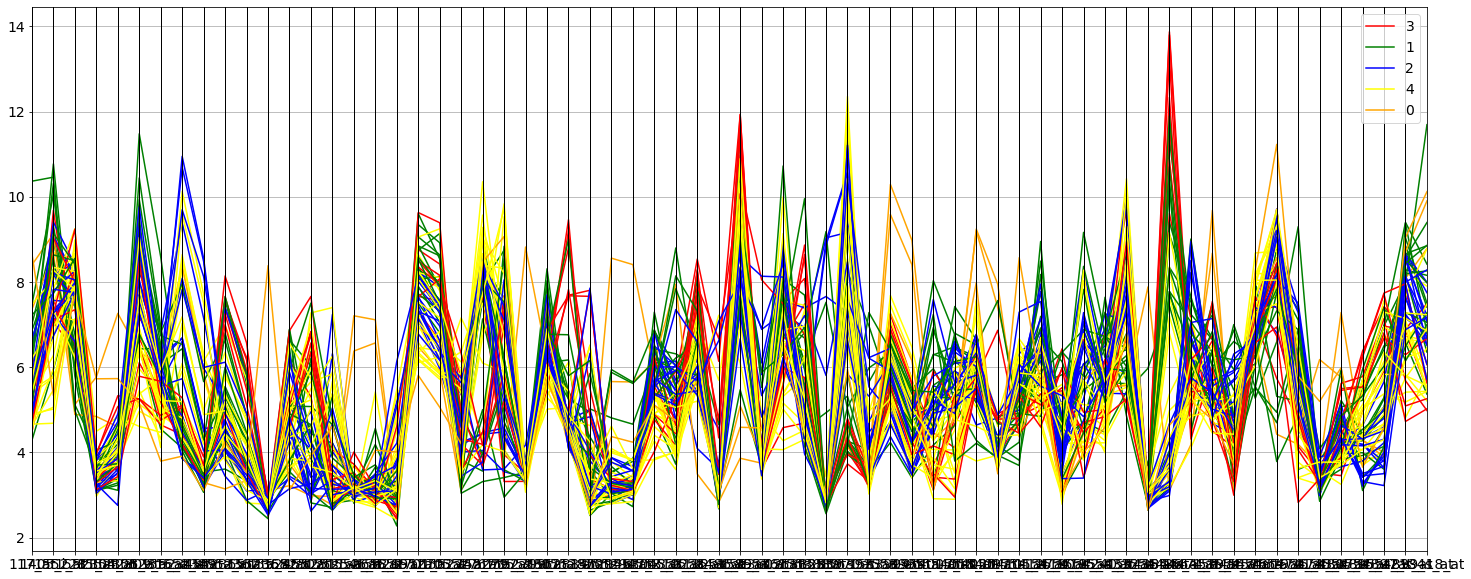

In [236]:
colors = ['red','green','blue','yellow','orange']
plt.rcParams["figure.figsize"] = (25, 10)
pd.plotting.parallel_coordinates(crc_imp, "Clusters", color=colors)


In [237]:
imp = p.tail(10)
imp.index

Index(['1553830_s_at', '1552348_at', '1552365_at', '1552767_a_at',
       '1554897_s_at', '1552834_at', '1553589_a_at', '1552502_s_at',
       '1553970_s_at', '1554436_a_at'],
      dtype='object')

In [238]:
imp2= pd.DataFrame(crc_imp, columns=imp.index)
imp2["Clusters"]= crc_imp["Clusters"]

<AxesSubplot:>

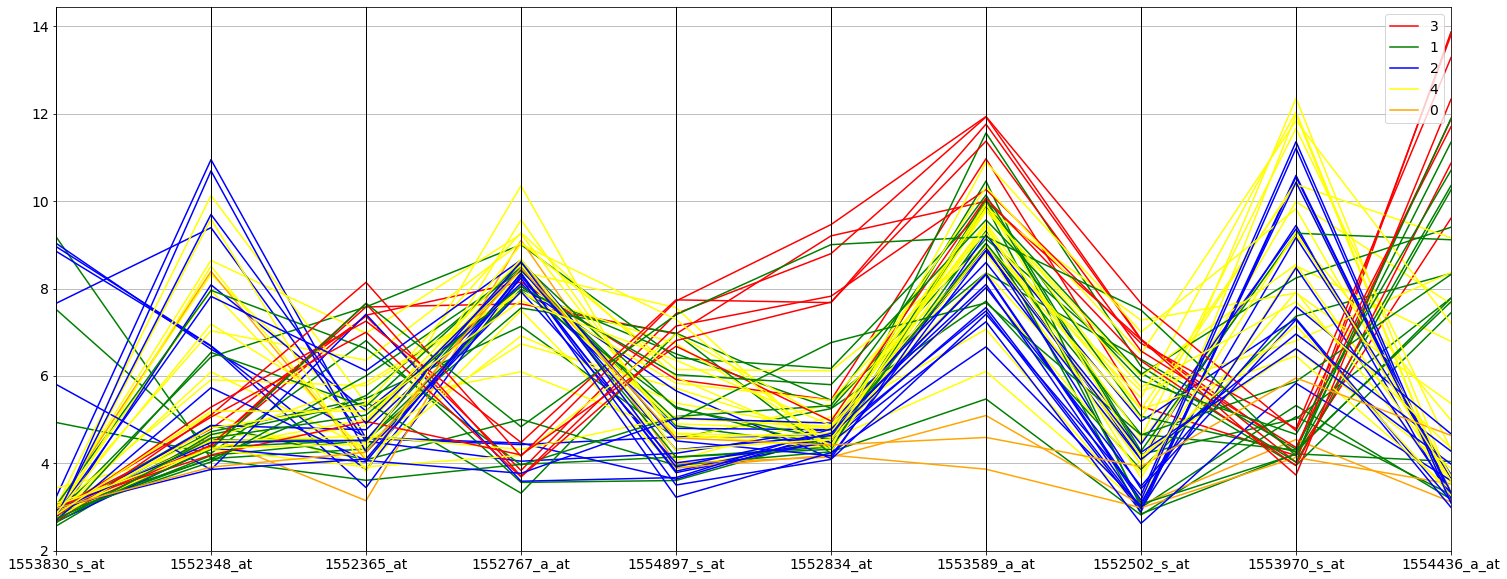

In [239]:
plt.rcParams["figure.figsize"] = (25, 10)
pd.plotting.parallel_coordinates(imp2,"Clusters", color=colors)


# Visualising Clusters

In [240]:
#Using MDS

mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(crc_imp.drop("Clusters", axis=1))

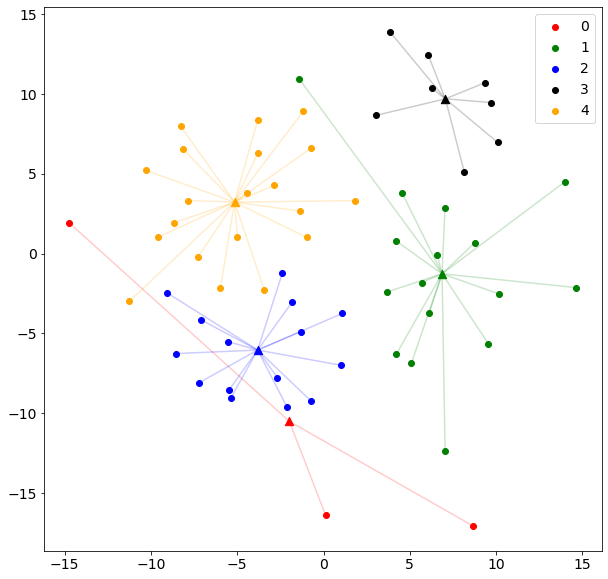

In [241]:
colors = ['red','green','blue','black','orange']
label = [0,1,2,3,4]
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
for i in np.unique(crc_imp.Clusters):
  subset = X_2d[crc_imp.Clusters == i]
  
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  cen_x = sum(x) / len(x) 
  cen_y = sum(y) / len(y)
  plt.scatter(x,y,c=colors[i], label=label[i], marker="o")
  plt.scatter(cen_x,cen_y,c=colors[i], marker="^", s=70)
  # plot lines
  for j in range(len(x)):
    xj = [x[j], cen_x]
    yj = [y[j], cen_y]
    plt.plot(xj, yj, c=colors[i], alpha=0.2)
plt.legend()
plt.show()

In [242]:
#Using PCA

data = crc_imp
pca = PCA()
pca1= pca.fit(data)
x_pca = pca.transform(data)
  
x_pca.shape

(62, 62)

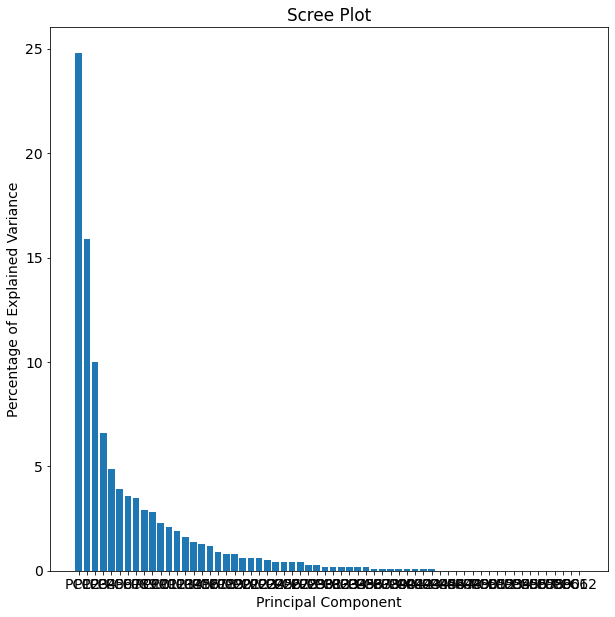

In [243]:
per_var = np.round(pca1.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'Second Principal Component')

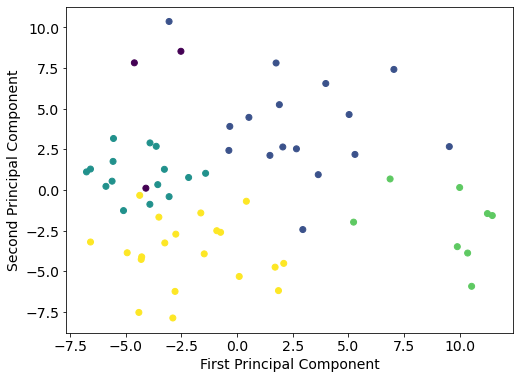

In [244]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = crc_imp['Clusters'])
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

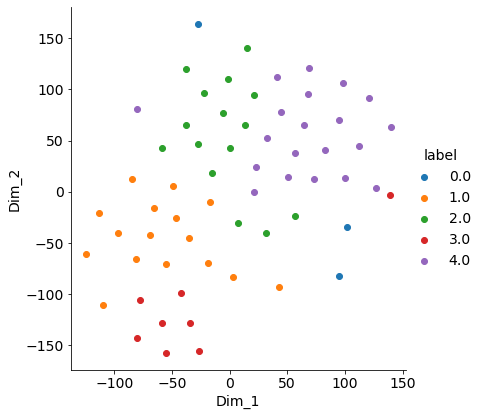

In [245]:
model = TSNE(n_components = 2, random_state = 0)
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000
 
tsne_data = model.fit_transform(data)
 
# creating a new data frame which
# help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, crc_imp["Clusters"])).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="label", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

In [246]:
Patients.columns

Index(['ID_REF', 'Age (in years)', 'Dukes Stage', 'Gender', 'Location',
       'DFS (in months)', 'DFS event', 'Adj_Radio', 'Adj_Chem'],
      dtype='object')

In [247]:
patient_feat = crc[[ 'Age (in years)', 'Dukes Stage', 'Gender', 'Location',
       'DFS (in months)', 'DFS event', 'Adj_Radio', 'Adj_Chem']]


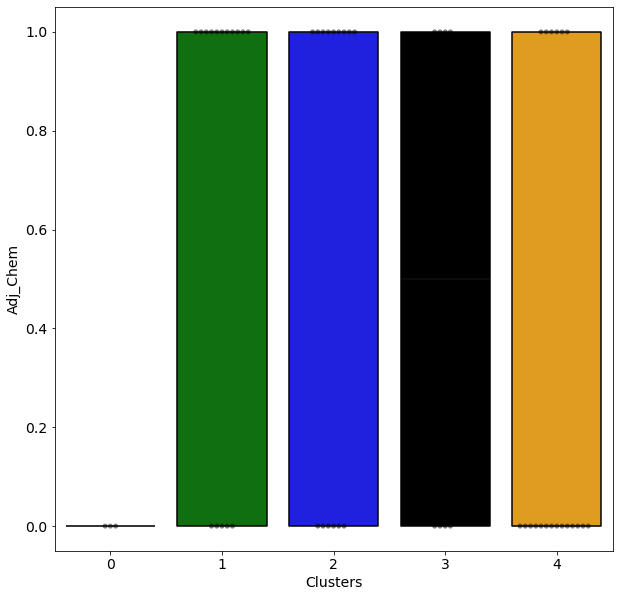

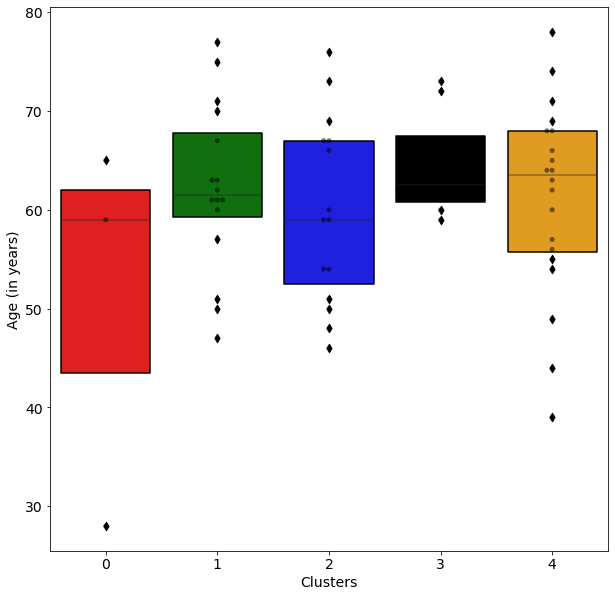

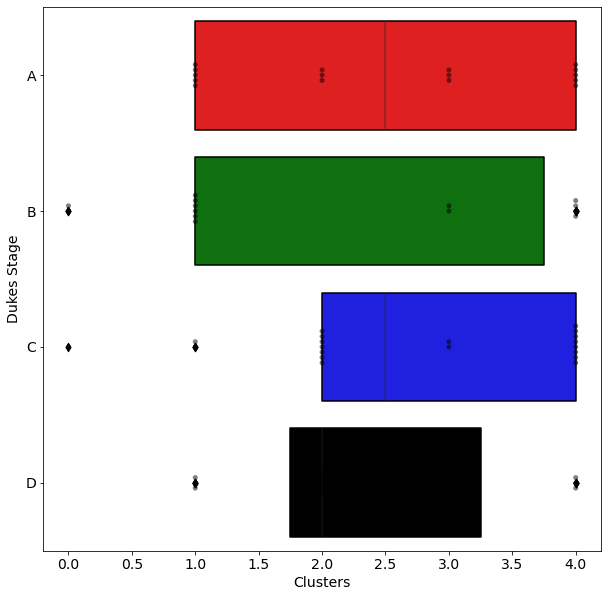

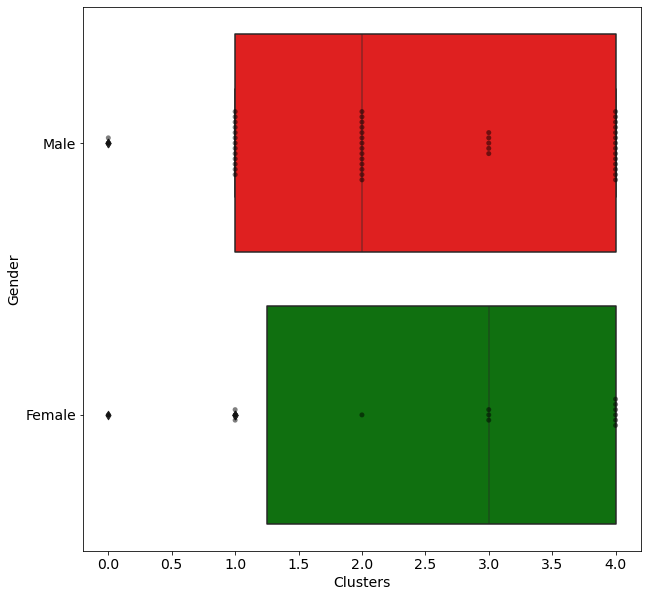

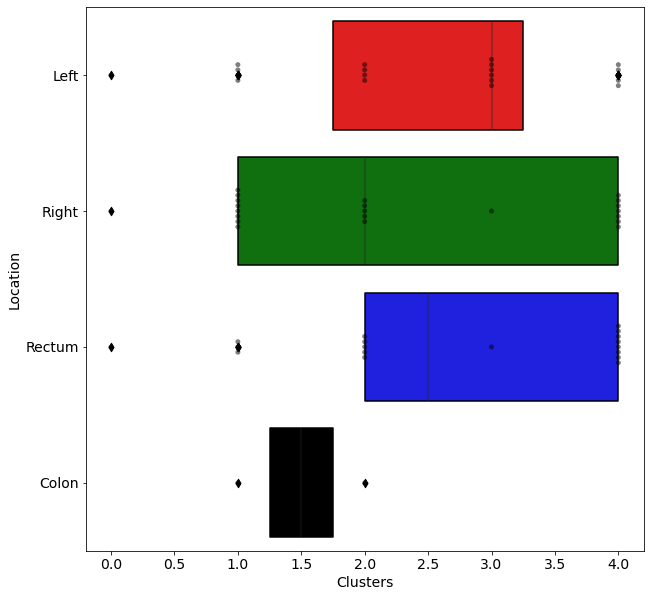

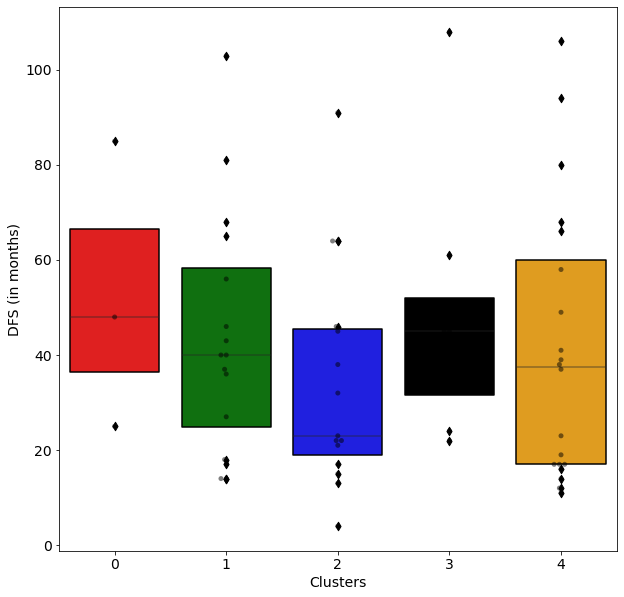

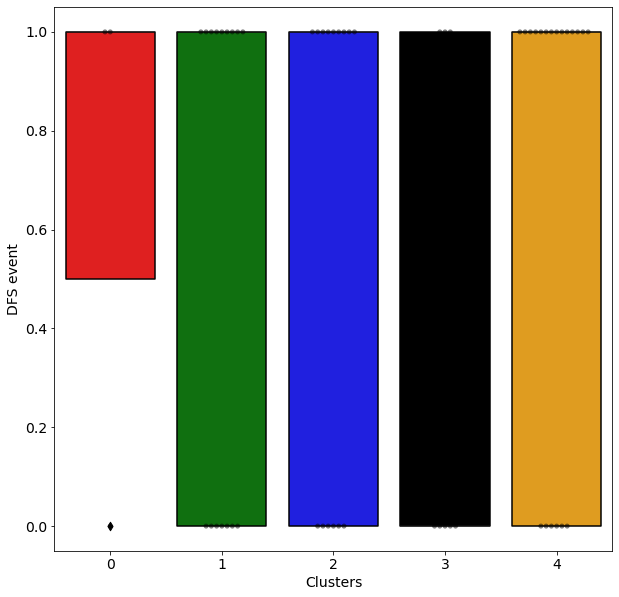

In [ ]:
for i in range(8):
    sns.swarmplot(x=crc_imp["Clusters"], y=patient_feat.iloc[:,i-1], color="black", alpha=0.5 )
    sns.boxenplot(x=crc_imp["Clusters"], y=patient_feat.iloc[:,i-1], palette=colors)
    plt.show()